In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import re
import pickle as pk
from scipy.signal import hilbert
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
id = []
cant_Tw = []
cant_RT = []
for archivo in os.listdir(path+'Tw_mas_RT_all'):
    df_clus_completo = pd.read_csv(path+'Tw_mas_RT_all/'+archivo)
    patron = re.compile(r'_(\d+).csv')
    coincidencia = patron.search(archivo)
    index = coincidencia.group(1)

    categoria = 'RT'

    df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
    df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

    id.append(index)
    cant_Tw.append(len(df_categoria_false))
    cant_RT.append(len(df_categoria_true))

In [22]:
df = pd.DataFrame({'index': id, 'cant_Tw': cant_Tw, 'cant_RT': cant_RT})
df['bueno'] = False

In [23]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
id = []
cant_Tw = []
cant_RT = []
for archivo in os.listdir(path+'Tw_mas_RT_august'):
    df_clus_completo = pd.read_csv(path+'Tw_mas_RT_august/'+archivo)
    patron = re.compile(r'_(\d+).csv')
    coincidencia = patron.search(archivo)
    index = coincidencia.group(1)

    categoria = 'RT'

    df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
    df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

    id.append(index)
    cant_Tw.append(len(df_categoria_false))
    cant_RT.append(len(df_categoria_true))

df_bueno = pd.DataFrame({'index': id, 'cant_Tw': cant_Tw, 'cant_RT': cant_RT})
df_bueno['bueno'] = True

In [24]:
df_tot = pd.concat([df_bueno, df])
df_tot = df_tot.drop_duplicates(subset=['index'])
df_malo = df_tot[df_tot['bueno'] ==False]
df_bb = df_tot[df_tot['bueno'] ==True]

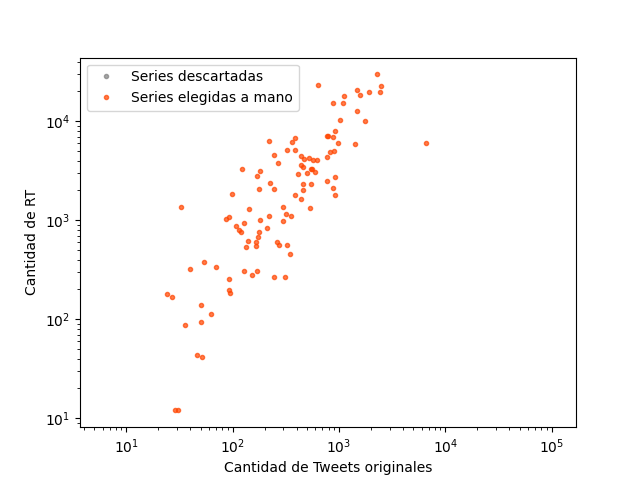

In [25]:
plt.figure()
plt.plot(df_malo['cant_Tw'], df_malo['cant_RT'], marker = 'o', markersize = 3, color = 'gray', alpha = 0.7, linestyle = 'none', label = 'Series descartadas')
plt.plot(df_bb['cant_Tw'], df_bb['cant_RT'], marker = 'o', markersize = 3, color = 'orangered', alpha = 0.7, linestyle = 'none', label  = 'Series elegidas a mano')
plt.xlabel('Cantidad de Tweets originales')
plt.ylabel('Cantidad de RT')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [13]:
df_malo.sort_values(by = 'cant_Tw', ascending=False)

,index,cant_Tw,cant_RT,bueno
9,147,21994,255391,False
5,109,20333,261013,False
36,214,20172,214408,False
60,257,17598,197307,False
25,196,13287,145302,False
...,...,...,...,...
112,344,4,2,False
120,352,3,1,False
121,353,3,27,False
3,107,2,0,False


In [4]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
citas = pk.load(open(path+'cita_media_cluster_august.pk', 'rb')) #Cargamos las citas de octubre

In [5]:
%matplotlib widget
index = 27# seleccionamos el index
df_clus_completo = pd.read_csv(path+f'Tw_mas_RT_all/RT_Tw_cluster_{index}.csv')
df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600

# Poenemmos la fecha en un formaot que nos guste
# Separamos el csv en los Tw_originales y los que son RT

categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True] 
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = ['RT', 'Tw originales']

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

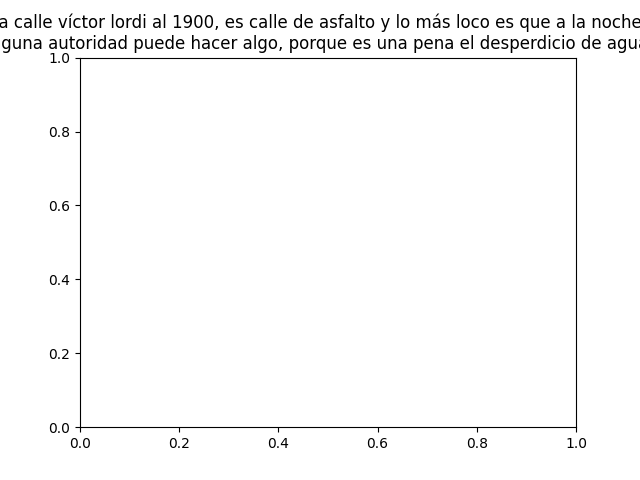

In [6]:
plt.figure()
firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
plt.title(str(index)+'   ' + firstpart+'\n'+secondpart)
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')
    df_count_hora = df_index.resample('1H').count()

    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    result = seasonal_decompose(df_count_hora['Tweets'], model='additive')
    trend = result.trend.fillna(0)

    plt.plot(df_count_hora.index, df_count_hora['Tweets']/max(df_count_hora['Tweets']), label = 'crudo '+str(labels[i]), marker = '.') #nuevo suavizado
    plt.plot(trend/max(trend), label = 'tendencia ' + labels[i])

    #plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid') #suavizado iejo

#plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H')
#           , labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)-165)) #para poner en horas la serie temporal, el '165' es para una serie en particular pero hay que cambiarlo para cada serie

plt.legend()
plt.grid(0.7)
plt.xticks(rotation=45)
fecha_inicio = pd.to_datetime('2019-08-27')
fecha_fin = pd.to_datetime('2019-08-31')
#plt.xlim([fecha_inicio, fecha_fin])
#plt.savefig(path+f'imagenes_agosto/serie_{index}.png')
plt.show()

In [7]:
df_clus_completo

,Unnamed: 0,id,Tweets,distances,Fecha,index,RT,HorasDesdeInicio
0,0,1162358537428832257,"Así cumplió Massa y Zamora... Don Torcuato, ha...",0.668159,2019-08-16 13:40:45,435429,False,368.065833
1,1,1160709793046237184,"@CascallaresPJ Yo te voto, pero para q sigas a...",0.717372,2019-08-12 00:29:14,862276,False,258.873889
2,2,1160608064250294272,@electroncromo37 Jajaja vivo en calle de tierr...,0.747244,2019-08-11 17:45:00,842944,False,252.136667
3,3,1158352589051838464,@Mariof197740 @alexibareiro es para hacer cloa...,0.750057,2019-08-05 12:22:33,692299,False,102.762500
4,4,1160959004161581058,Hasta cuando esta pesadilla q vivimos en Marac...,0.762063,2019-08-12 16:59:30,986157,False,275.378333
...,...,...,...,...,...,...,...,...
901,901,1160572176183025664,"Fui a intentar votar, en el camino estaba la f...",0.893158,2019-08-11 15:22:23,9059288,False,249.759722
902,902,1166294282178686981,#Pobreza 🇦🇷⚠️ #Opinión | Un estudio analiza lo...,0.893957,2019-08-27 10:20:00,8863819,False,628.720000
903,903,1166552697719463936,@Fmdb5 @leosvirsky @cbuteler @alferdez los pre...,0.898512,2019-08-28 03:26:51,8886896,False,645.834167
904,904,1159785750763855878,#BuenViernes #Salta #Elecciones2019\n\nEl GOBE...,0.898872,2019-08-09 11:17:25,9433159,False,197.676944


In [13]:
import json
with open('d:/Facultad/Tesis/Twitter/201903-Peronista.txt','r', encoding = 'utf8') as fp:
    retweet_ids = [json.loads(line).get('retweeted_status', {}).get('id', '') for line in fp]


In [2]:
import json

with open('d:/Facultad/Tesis/Twitter/201903-Peronista.txt','r', encoding = 'utf8') as fp:
    for i, line in enumerate(fp):
        json_data = json.loads(line)
        retweeted_status = json_data.get('retweeted_status', None)
        print(retweeted_status['id'])
        if i==50:
            break


1101167168308346880
1101317357027426304
1099342500018487296
1101310327210299398
1101310327210299398


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import os
import json
import pandas as pd

def agregar_RT(Tweeets_df):
    retweets_data = []
    end = '.txt'
    path_sophy = '../../sophy/NYData2022/August_Data/'
    list_dir = os.listdir(path_sophy)

    # Obtén la lista de ids una vez fuera del bucle
    id_cluster = set(Tweeets_df['id'])

    for filename in (list_dir):
        if filename.endswith(end) and filename != 'keywords.txt':
            file_path = os.path.join(path_sophy, filename)
            try:
                # Lee solo el atributo 'retweeted_status.id' del JSON
                with open(file_path, 'r', encoding='utf8') as fp:
                    retweet_ids = [json.loads(line).get('retweeted_status', {}).get('id', '') for line in fp]
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {file_path}: {e}")
                continue

            # Filtra los ids que están en id_cluster
            retweet_ids_filtered = [original_id for original_id in retweet_ids if original_id in id_cluster]

            for original_id in retweet_ids_filtered:
                with open(file_path, 'r', encoding='utf8') as fp:
                    for line in fp:
                        json_data = json.loads(line)
                        if json_data.get('retweeted_status', {}).get('id', '') == original_id:
                            tweet = json_data.get('text', '')
                            if tweet.startswith('RT'):
                                print('entre para agregar RT')
                                filt = Tweeets_df['id'] == original_id
                                Tweet = Tweeets_df.loc[filt, 'Tweets'].tolist()[0]
                                retweets_data.append({
                                    "id": original_id,
                                    "Tweets": Tweet,
                                    "distances": 0,
                                    "Fecha": json_data['created_at'],
                                    "index": 0,
                                    "RT": True
                                })

    return retweets_data
